# E-tivity 3: Linear classification
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

<span style="color:red">TODO: Add student id to filename.</span>  
<span style="color:red">TODO: Add labels to all plots.</span>  


In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

# Task 3 (CE6002)
#### *Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.*
 
Interesting reads: 
  * https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
  * https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.9-The-Moore-Penrose-Pseudoinverse/ (homemade linear regression algo)
  * https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python (confusion matrix)
  
<span style="color:red">TODO: Split between training and testing data.</span>  
<span style="color:red">TODO: Calculate Mean Squared Error.</span>  

Taking a look at the data set:
  * X: is a 2D array of floats
  * y: is a 1D array of +1 and -1 values

In [4]:
print("X:", X)
print("\ny:", y)

X: [[-0.75405868 -0.22834094]
 [ 0.40552165 -0.61629124]
 [ 0.72363252  0.32451462]
 ...
 [-0.0817019   1.0558032 ]
 [ 0.95484731 -0.34048413]
 [-0.1985736   0.87244109]]

y: [1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1

In [5]:
Xcopy = np.copy(X)

In [6]:
# Plot the boundary
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [7]:
def linear_regression(X, y):
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    return w_lin


def calc_square_error(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
    return math.sqrt(e_sq/N)



def calculate_and_plot_linear_regression(X, y):
    
    # Insert bias
    X = np.insert(X, 0, 1, axis=1)

    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=X[100:]
    #y_train=y[100:]
    #X_test=X[:100]
    #y_test=y[:100]

    # Linear regression
    weights = linear_regression(X_train, y_train)
    
    # Plot test data
    plt.scatter(X[:,1], X[:,2], c=y)

    # Plot
    minx = np.amin(X)
    maxx = np.amax(X)
    miny, maxy = decision_boundary_lin(weights, minx, maxx)
    plt.plot([minx, maxx], [miny, maxy], 'ro-')
    
    # yhat (multiply yhat by 2 so that, when plotted, it doesn't overlap with scatter plot of X)
    yhat = X_test.dot(weights)
    plt.scatter(X_test[:,1], np.sign(yhat)*2, c=y_test)
    
    # error
    error = calc_square_error(y_test,  yhat)
    
    # Marker for center point at coordinates (0,0)
    plt.plot([0], [0], marker='x', markersize=30, color="red")

    
    return weights, yhat, error


Error: 1.0024029389531415


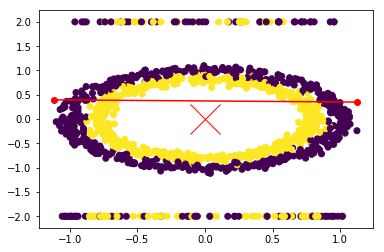

In [8]:
X = np.copy(Xcopy)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

#### *Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

If the linear regression is executed on the entire data set, the boundary line splits the data set evenly, and passes through the origin,  
This decision boundary would equate to a very high error rate.

if we run the linear algorithm on a subset of the data set, that is if we split between training and testing data, the boundary line does not split the data set evenly. This is counter intuitive as it seems there are enought samples for the algorithm to correctly estimate the weights. Maybe there is a **bug** the in function used to draw the boundary.

*TODO*: Calculate the error


#### *Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

Interesting reads: 
  *   https://www.deeplearningbook.org/contents/ml.html (page 110, figure 5.16)
  
##### Square transformation  

Error: 0.44462808239540347


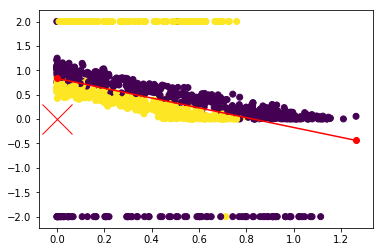

In [9]:
X = np.copy(Xcopy)
X = np.square(X)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

##### Cubic transformation
We can see that for the cubic transformation, the error is has high as with the original data set. This is expected as the cubic transformation preserves the sign of X which results is a distribution pattern centered around the origin in our case.

Error: 1.001593590986964


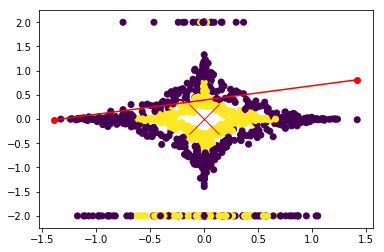

In [10]:
X = np.copy(Xcopy)
X = np.power(X, 3)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

##### Power 4 transformation
The error is higher than for the power of 2 transformation. This is counter intuitive as I would have expected the error to remain the same. However this could be a sign of **overfitting**.


Error: 0.6350453789956244


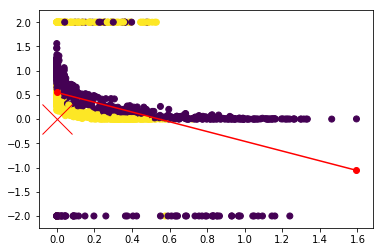

In [11]:
X = np.copy(Xcopy)
X = np.power(X, 4)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

##### Trigonometric transformations
Out of curiosity, I wanted to see the impact of a trigonometric function on the Linear classification, instead of a polynomial transformation.

Reference: https://commons.wikimedia.org/wiki/Trigonometric_function_plots

We can see that cos() and cosh() gives an error rate similar to square(). This doesn't mean that, in general, cos() is a good as square(). The fact that the error is as good as square() probably boils down to the original method for creating the sample data. By chance, none of the data would generate a negative value when passed to the cosinus function.

Error: 0.4447297907501549


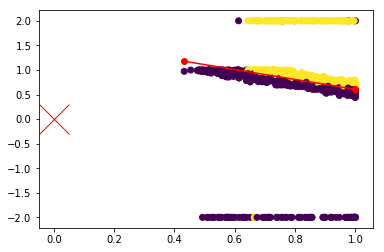

In [12]:
X = np.copy(Xcopy)
X = np.cos(X)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

Error: 0.4508500184871941


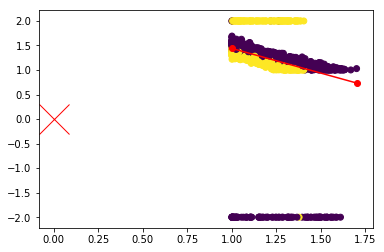

In [13]:
X = np.copy(Xcopy)
X = np.cosh(X)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

Error: 1.0025168174972554


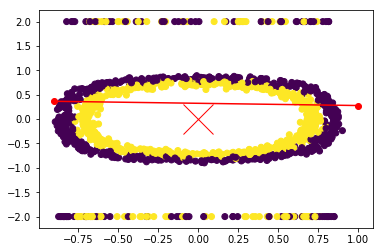

In [14]:
X = np.copy(Xcopy)
X = np.sin(X)

weights, yhat, error = calculate_and_plot_linear_regression(X, y)
print("Error:", error)

#### *Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*

Interesting links: 
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  * https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
  * https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
 
<span style="color:red">TODO: Plot data set with decision boundary line.</span>  


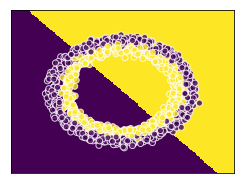

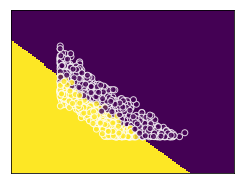

In [15]:
def logistic_regression_scikit(X, Y):
    color_map = 'Pastel1'
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.8, edgecolors='w')


    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()


# Logistic regression on X
X = np.copy(Xcopy)
logistic_regression_scikit(X, y)

# Logistic regression on X square
logistic_regression_scikit(np.square(X), y)
